# 1. Importación de Librerías

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

from imblearn.over_sampling import SMOTE

from scipy.stats import randint, uniform

# 2. Preprocesamiento de Datos

In [ ]:
train = pd.read_csv('Training.csv')
test = pd.read_csv('Testing.csv')

X, y = train.drop(['prognosis'], axis=1), train['prognosis']

display(X.head())

display(X.info())
display(X.shape)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132)
memory usage: 5.0 MB


None

(4920, 133)

In [ ]:
X.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
Unnamed: 133             True
Length: 133, dtype: bool

In [ ]:
display(y.describe(), X.select_dtypes('float').describe())

count                 4920
unique                  41
top       Fungal infection
freq                   120
Name: prognosis, dtype: object

,Unnamed: 133
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


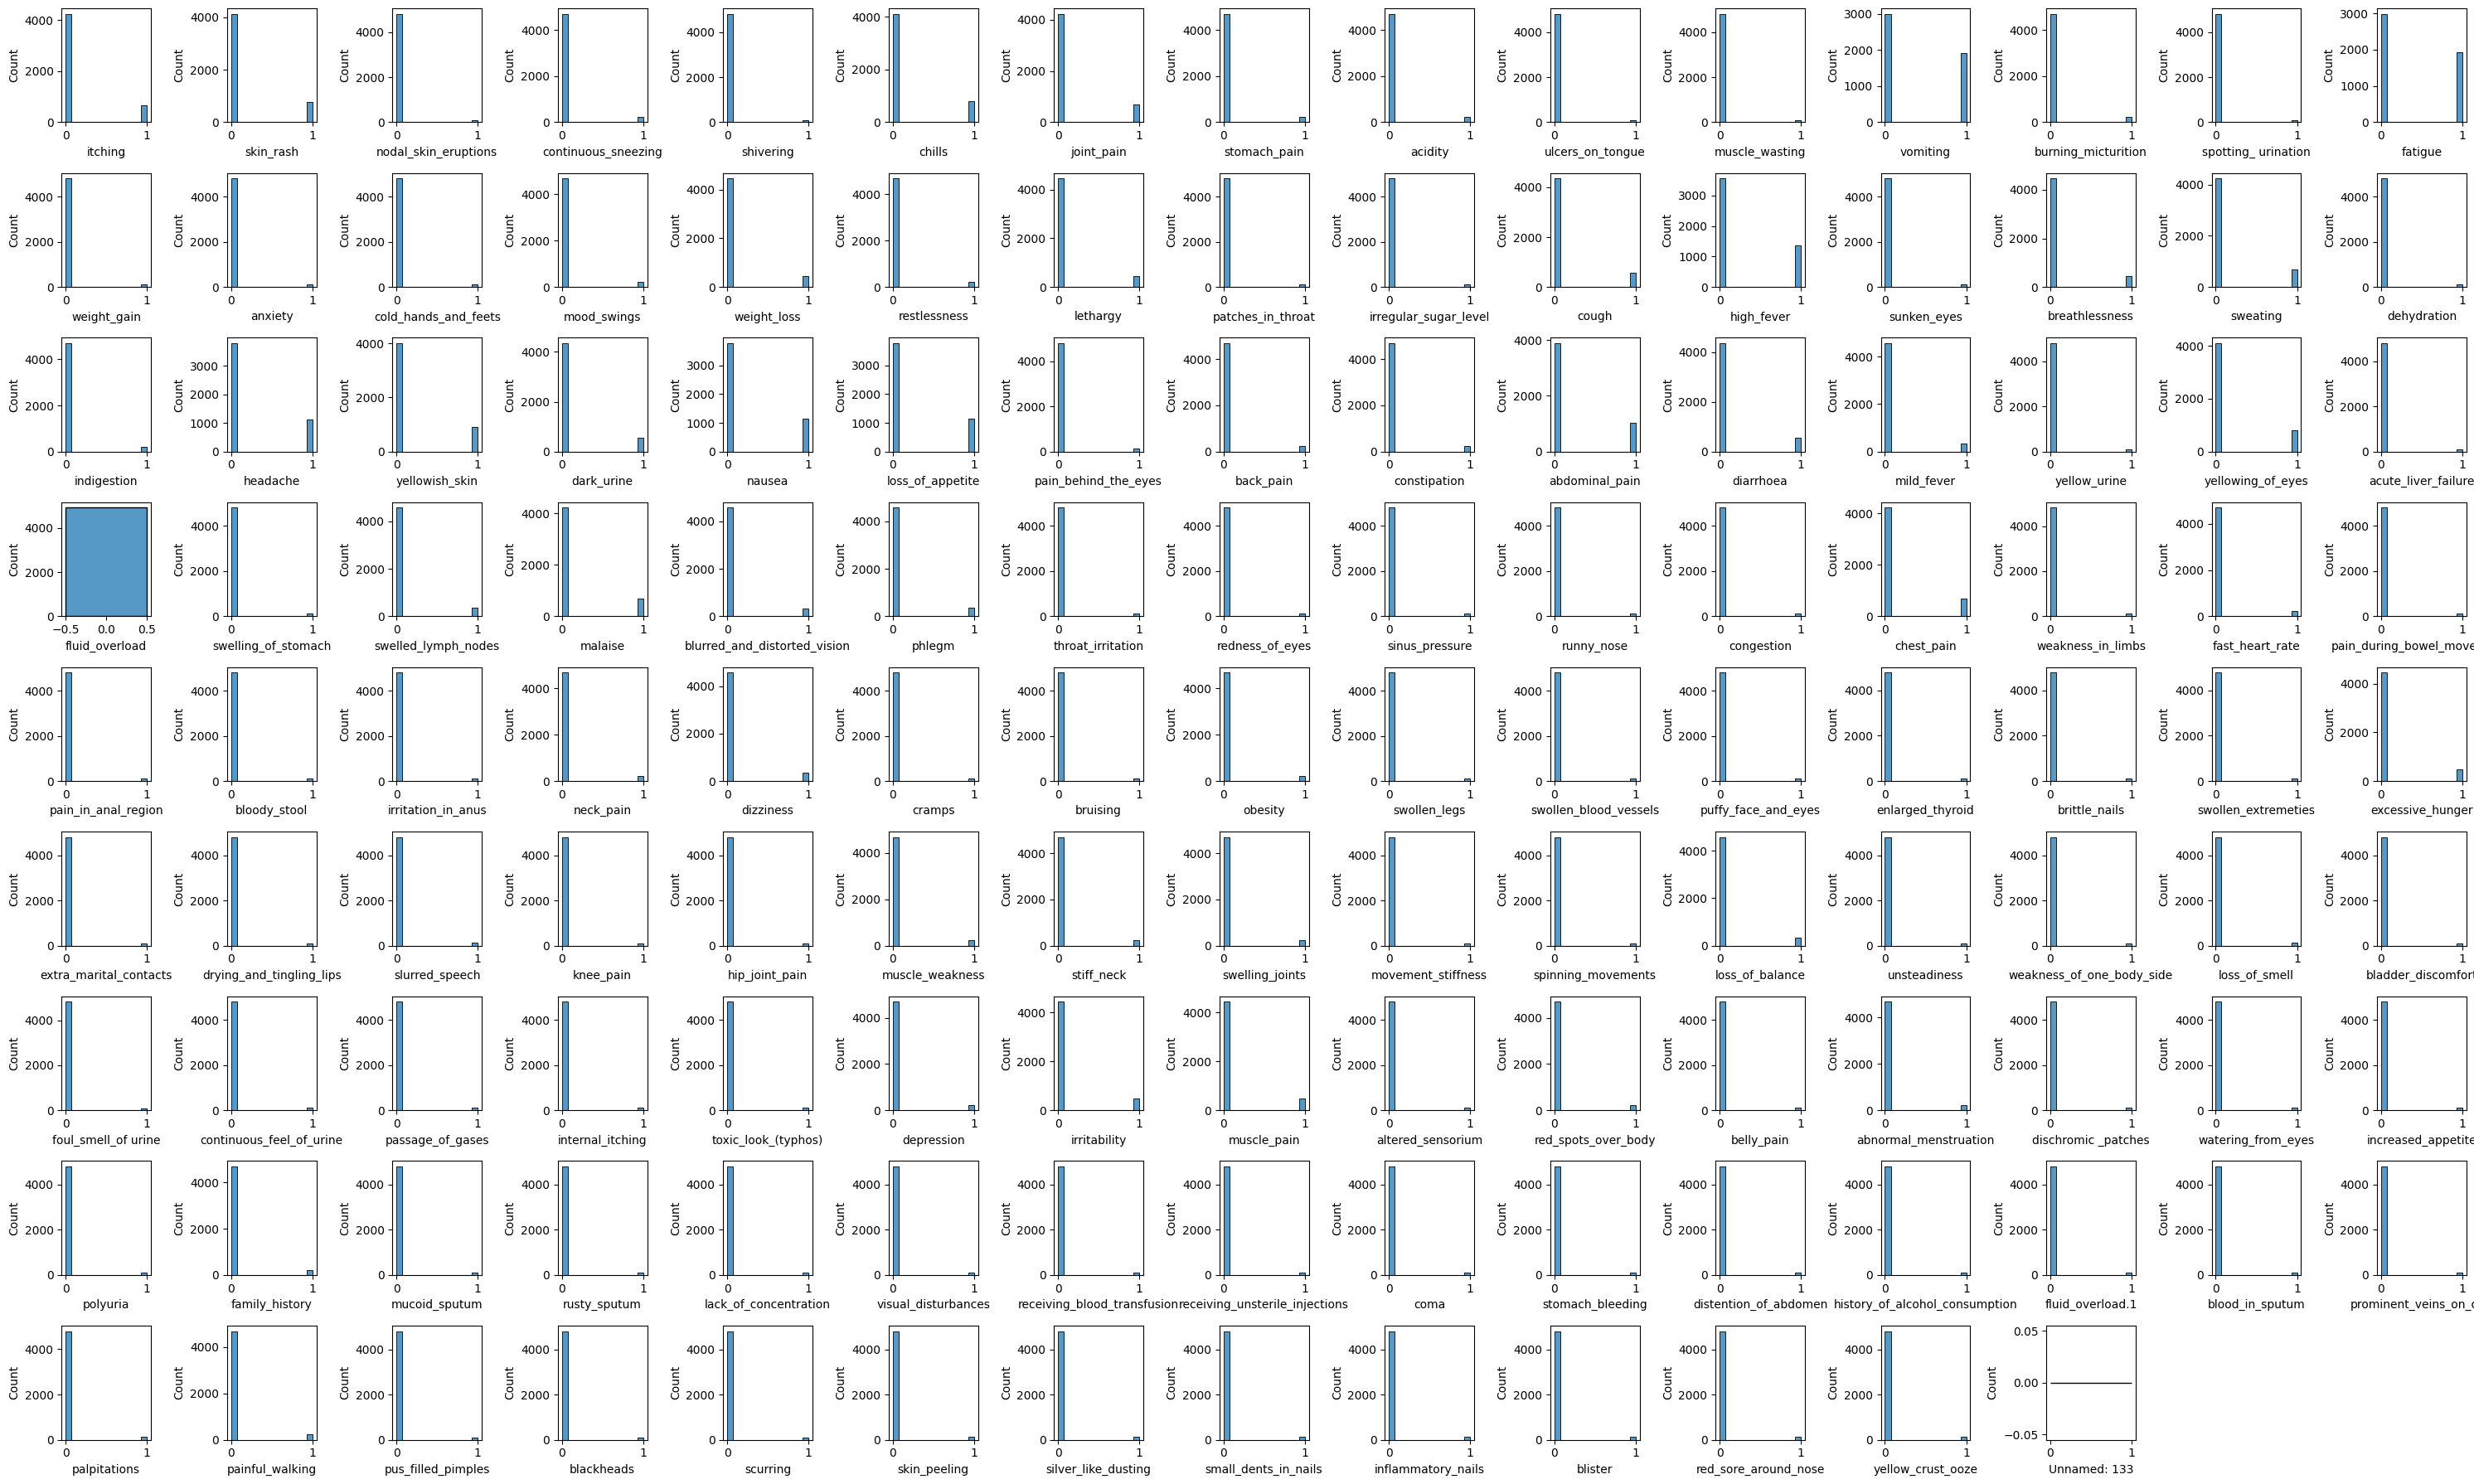

In [ ]:
figure = plt.figure(figsize=(30, 18))
for counter, column in enumerate(X):
    plt.subplot(9, 15, counter+1)
    sns.histplot(X, x=column)
figure.tight_layout()
figure.show()

In [ ]:
X_test, y_test = test.drop(['prognosis'], axis=1), test['prognosis']

# init columnas que voy a tirar
to_my_belly = []

# Columnas con poca varianza, me las voy a comer
p = 0.025
menu = VarianceThreshold(threshold= p*(1-p)).fit(X)
low_variance_columns = X.columns[~menu.get_support()]
to_my_belly.extend(low_variance_columns)

print(to_my_belly)

X_train = X.drop(to_my_belly, axis=1)
X_test = X_test[X_train.columns]

# Se separa el conjunto de datos en entrenamiento y validación con un 80% y 20% respectivamente
# X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y)
y_test = encoder.transform(y_test)

# Unnames: 133 fue eliminado porque era una columna llena de Nans
# fluid_overload fue eliminado ya que todas las respuestas recibidas fueron ceros.

['nodal_skin_eruptions', 'shivering', 'ulcers_on_tongue', 'muscle_wasting', 'spotting_ urination', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'patches_in_throat', 'irregular_sugar_level', 'sunken_eyes', 'dehydration', 'pain_behind_the_eyes', 'yellow_urine', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'weakness_in_limbs', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'cramps', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'movement_stiffness', 'spinning_movements', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'tox

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_variance_threshold.py:111: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [ ]:
X_train.columns

Index(['itching', 'skin_rash', 'continuous_sneezing', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'vomiting', 'burning_micturition', 'fatigue',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'cough',
       'high_fever', 'breathlessness', 'sweating', 'indigestion', 'headache',
       'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellowing_of_eyes', 'swelled_lymph_nodes', 'malaise',
       'blurred_and_distorted_vision', 'phlegm', 'chest_pain',
       'fast_heart_rate', 'neck_pain', 'dizziness', 'obesity',
       'excessive_hunger', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
       'loss_of_balance', 'depression', 'irritability', 'muscle_pain',
       'red_spots_over_body', 'abnormal_menstruation', 'family_history',
       'painful_walking'],
      dtype='object')

# 3. Análisis de Exploratorio de Datos

In [ ]:
X_train.describe()

,itching,skin_rash,continuous_sneezing,chills,joint_pain,stomach_pain,acidity,vomiting,burning_micturition,fatigue,...,stiff_neck,swelling_joints,loss_of_balance,depression,irritability,muscle_pain,red_spots_over_body,abnormal_menstruation,family_history,painful_walking
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.045122,0.162195,0.139024,0.045122,0.045122,0.389024,0.043902,0.392683,...,0.046341,0.046341,0.069512,0.047561,0.096341,0.096341,0.047561,0.048780,0.046341,0.046341
std,0.344730,0.366417,0.207593,0.368667,0.346007,0.207593,0.207593,0.487578,0.204899,0.488397,...,0.210245,0.210245,0.254349,0.212857,0.295089,0.295089,0.212857,0.215431,0.210245,0.210245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.DataFrame(y_train).describe()

,0
count,4920.000000
mean,20.000000
std,11.833362
min,0.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,40.000000


<Axes: ylabel='Count'>

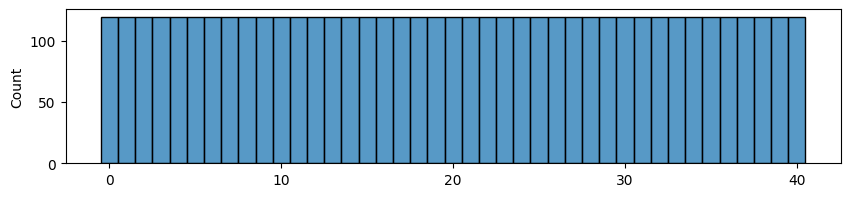

In [ ]:
figure2 = plt.figure(figsize=(10,2))
sns.histplot(y_train, discrete=True)

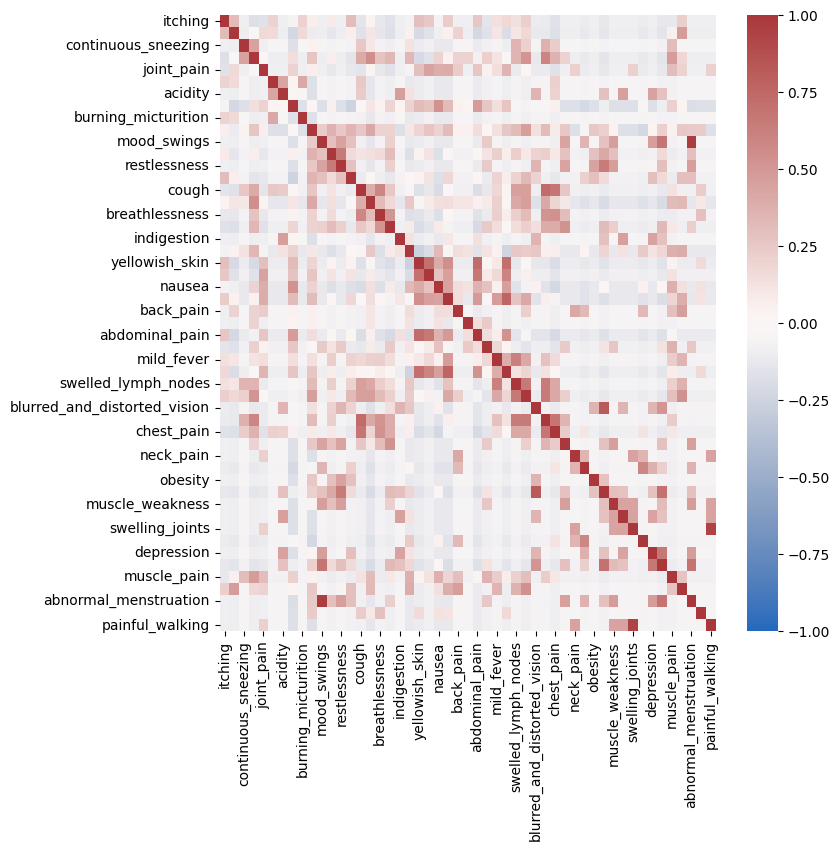

In [ ]:
figure3 = plt.figure(figsize=(8,8))
sns.heatmap(X_train.corr(),
            cmap='vlag',
            vmin=-1,
            vmax=1)
plt.show()

Observamos que existen variables que están altamente correlacionadas entre si. Esto es concernante para modelos como el de regresión logística, debido a su sensibilidad a la colinearidad. Para evitar que este sea un problema para los modelos, se implementa un método de seleccion de características para optimizar los resultados.

# 5. Implementación de Maquina de Vectores de Soporte: Clasificación

In [ ]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)

model = SVC()

scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1_weighted': make_scorer(f1_score, average='weighted', zero_division=0),
    # 'roc_auc': make_scorer(roc_auc_score, average='weighted')
}

param_dist = {
    'C' : uniform(0,5),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : randint(2,5),
    'gamma': ['scale', 'auto'],
    'coef0': uniform(0, 100),
    'max_iter' : randint(1, 10)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring=scorers,
    refit='f1_weighted',
    verbose=10,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Once you have the best hyperparameters, retrain the model on the combined training + validation set
svclassifier = random_search.best_estimator_
svclassifier.set_params(**random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=1.8727005942368125, coef0=95.07143064099162, degree=4, gamma=auto, kernel=linear, max_iter=5
[CV 1/5; 1/10] END C=1.8727005942368125, coef0=95.07143064099162, degree=4, gamma=auto, kernel=linear, max_iter=5; accuracy: (test=0.936) f1_weighted: (test=0.921) precision: (test=0.915) recall: (test=0.936) total time=   0.1s
[CV 2/5; 1/10] START C=1.8727005942368125, coef0=95.07143064099162, degree=4, gamma=auto, kernel=linear, max_iter=5
[CV 2/5; 1/10] END C=1.8727005942368125, coef0=95.07143064099162, degree=4, gamma=auto, kernel=linear, max_iter=5; accuracy: (test=0.927) f1_weighted: (test=0.903) precision: (test=0.891) recall: (test=0.927) total time=   0.1s
[CV 3/5; 1/10] START C=1.8727005942368125, coef0=95.07143064099162, degree=4, gamma=auto, kernel=linear, max_iter=5


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5; 1/10] END C=1.8727005942368125, coef0=95.07143064099162, degree=4, gamma=auto, kernel=linear, max_iter=5; accuracy: (test=0.913) f1_weighted: (test=0.889) precision: (test=0.879) recall: (test=0.913) total time=   0.1s
[CV 4/5; 1/10] START C=1.8727005942368125, coef0=95.07143064099162, degree=4, gamma=auto, kernel=linear, max_iter=5
[CV 4/5; 1/10] END C=1.8727005942368125, coef0=95.07143064099162, degree=4, gamma=auto, kernel=linear, max_iter=5; accuracy: (test=0.935) f1_weighted: (test=0.919) precision: (test=0.911) recall: (test=0.935) total time=   0.1s
[CV 5/5; 1/10] START C=1.8727005942368125, coef0=95.07143064099162, degree=4, gamma=auto, kernel=linear, max_iter=5
[CV 5/5; 1/10] END C=1.8727005942368125, coef0=95.07143064099162, degree=4, gamma=auto, kernel=linear, max_iter=5; accuracy: (test=0.943) f1_weighted: (test=0.932) precision: (test=0.928) recall: (test=0.943) total time=   0.1s
[CV 1/5; 2/10] START C=0.7800932022121826, coef0=15.599452033620265, degree=4, gamma

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5; 2/10] END C=0.7800932022121826, coef0=15.599452033620265, degree=4, gamma=scale, kernel=sigmoid, max_iter=5; accuracy: (test=0.790) f1_weighted: (test=0.749) precision: (test=0.740) recall: (test=0.790) total time=   0.2s
[CV 2/5; 2/10] START C=0.7800932022121826, coef0=15.599452033620265, degree=4, gamma=scale, kernel=sigmoid, max_iter=5


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5; 2/10] END C=0.7800932022121826, coef0=15.599452033620265, degree=4, gamma=scale, kernel=sigmoid, max_iter=5; accuracy: (test=0.799) f1_weighted: (test=0.759) precision: (test=0.752) recall: (test=0.799) total time=   0.2s
[CV 3/5; 2/10] START C=0.7800932022121826, coef0=15.599452033620265, degree=4, gamma=scale, kernel=sigmoid, max_iter=5
[CV 3/5; 2/10] END C=0.7800932022121826, coef0=15.599452033620265, degree=4, gamma=scale, kernel=sigmoid, max_iter=5; accuracy: (test=0.810) f1_weighted: (test=0.766) precision: (test=0.753) recall: (test=0.810) total time=   0.2s
[CV 4/5; 2/10] START C=0.7800932022121826, coef0=15.599452033620265, degree=4, gamma=scale, kernel=sigmoid, max_iter=5


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5; 2/10] END C=0.7800932022121826, coef0=15.599452033620265, degree=4, gamma=scale, kernel=sigmoid, max_iter=5; accuracy: (test=0.786) f1_weighted: (test=0.739) precision: (test=0.740) recall: (test=0.786) total time=   0.2s
[CV 5/5; 2/10] START C=0.7800932022121826, coef0=15.599452033620265, degree=4, gamma=scale, kernel=sigmoid, max_iter=5
[CV 5/5; 2/10] END C=0.7800932022121826, coef0=15.599452033620265, degree=4, gamma=scale, kernel=sigmoid, max_iter=5; accuracy: (test=0.815) f1_weighted: (test=0.778) precision: (test=0.774) recall: (test=0.815) total time=   0.2s
[CV 1/5; 3/10] START C=3.005575058716044, coef0=70.80725777960456, degree=3, gamma=scale, kernel=poly, max_iter=8


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5; 3/10] END C=3.005575058716044, coef0=70.80725777960456, degree=3, gamma=scale, kernel=poly, max_iter=8; accuracy: (test=0.892) f1_weighted: (test=0.866) precision: (test=0.857) recall: (test=0.892) total time=   0.1s
[CV 2/5; 3/10] START C=3.005575058716044, coef0=70.80725777960456, degree=3, gamma=scale, kernel=poly, max_iter=8
[CV 2/5; 3/10] END C=3.005575058716044, coef0=70.80725777960456, degree=3, gamma=scale, kernel=poly, max_iter=8; accuracy: (test=0.838) f1_weighted: (test=0.804) precision: (test=0.793) recall: (test=0.838) total time=   0.1s
[CV 3/5; 3/10] START C=3.005575058716044, coef0=70.80725777960456, degree=3, gamma=scale, kernel=poly, max_iter=8


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5; 3/10] END C=3.005575058716044, coef0=70.80725777960456, degree=3, gamma=scale, kernel=poly, max_iter=8; accuracy: (test=0.926) f1_weighted: (test=0.910) precision: (test=0.905) recall: (test=0.926) total time=   0.1s
[CV 4/5; 3/10] START C=3.005575058716044, coef0=70.80725777960456, degree=3, gamma=scale, kernel=poly, max_iter=8
[CV 4/5; 3/10] END C=3.005575058716044, coef0=70.80725777960456, degree=3, gamma=scale, kernel=poly, max_iter=8; accuracy: (test=0.855) f1_weighted: (test=0.822) precision: (test=0.809) recall: (test=0.855) total time=   0.1s
[CV 5/5; 3/10] START C=3.005575058716044, coef0=70.80725777960456, degree=3, gamma=scale, kernel=poly, max_iter=8


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5; 3/10] END C=3.005575058716044, coef0=70.80725777960456, degree=3, gamma=scale, kernel=poly, max_iter=8; accuracy: (test=0.915) f1_weighted: (test=0.896) precision: (test=0.909) recall: (test=0.915) total time=   0.1s
[CV 1/5; 4/10] START C=4.162213204002109, coef0=21.233911067827616, degree=2, gamma=scale, kernel=sigmoid, max_iter=6
[CV 1/5; 4/10] END C=4.162213204002109, coef0=21.233911067827616, degree=2, gamma=scale, kernel=sigmoid, max_iter=6; accuracy: (test=0.035) f1_weighted: (test=0.002) precision: (test=0.001) recall: (test=0.035) total time=   0.2s
[CV 2/5; 4/10] START C=4.162213204002109, coef0=21.233911067827616, degree=2, gamma=scale, kernel=sigmoid, max_iter=6


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5; 4/10] END C=4.162213204002109, coef0=21.233911067827616, degree=2, gamma=scale, kernel=sigmoid, max_iter=6; accuracy: (test=0.015) f1_weighted: (test=0.000) precision: (test=0.000) recall: (test=0.015) total time=   0.2s
[CV 3/5; 4/10] START C=4.162213204002109, coef0=21.233911067827616, degree=2, gamma=scale, kernel=sigmoid, max_iter=6


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5; 4/10] END C=4.162213204002109, coef0=21.233911067827616, degree=2, gamma=scale, kernel=sigmoid, max_iter=6; accuracy: (test=0.030) f1_weighted: (test=0.002) precision: (test=0.001) recall: (test=0.030) total time=   0.3s
[CV 4/5; 4/10] START C=4.162213204002109, coef0=21.233911067827616, degree=2, gamma=scale, kernel=sigmoid, max_iter=6


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5; 4/10] END C=4.162213204002109, coef0=21.233911067827616, degree=2, gamma=scale, kernel=sigmoid, max_iter=6; accuracy: (test=0.019) f1_weighted: (test=0.001) precision: (test=0.000) recall: (test=0.019) total time=   0.3s
[CV 5/5; 4/10] START C=4.162213204002109, coef0=21.233911067827616, degree=2, gamma=scale, kernel=sigmoid, max_iter=6


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5; 4/10] END C=4.162213204002109, coef0=21.233911067827616, degree=2, gamma=scale, kernel=sigmoid, max_iter=6; accuracy: (test=0.022) f1_weighted: (test=0.001) precision: (test=0.000) recall: (test=0.022) total time=   0.3s
[CV 1/5; 5/10] START C=0.03533152609858703, coef0=2.3062425041415757, degree=4, gamma=scale, kernel=rbf, max_iter=3
[CV 1/5; 5/10] END C=0.03533152609858703, coef0=2.3062425041415757, degree=4, gamma=scale, kernel=rbf, max_iter=3; accuracy: (test=0.808) f1_weighted: (test=0.790) precision: (test=0.797) recall: (test=0.808) total time=   0.2s
[CV 2/5; 5/10] START C=0.03533152609858703, coef0=2.3062425041415757, degree=4, gamma=scale, kernel=rbf, max_iter=3
[CV 2/5; 5/10] END C=0.03533152609858703, coef0=2.3062425041415757, degree=4, gamma=scale, kernel=rbf, max_iter=3; accuracy: (test=0.822) f1_weighted: (test=0.789) precision: (test=0.788) recall: (test=0.822) total time=   0.2s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV 3/5; 5/10] START C=0.03533152609858703, coef0=2.3062425041415757, degree=4, gamma=scale, kernel=rbf, max_iter=3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5; 5/10] END C=0.03533152609858703, coef0=2.3062425041415757, degree=4, gamma=scale, kernel=rbf, max_iter=3; accuracy: (test=0.827) f1_weighted: (test=0.795) precision: (test=0.793) recall: (test=0.827) total time=   0.2s
[CV 4/5; 5/10] START C=0.03533152609858703, coef0=2.3062425041415757, degree=4, gamma=scale, kernel=rbf, max_iter=3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5; 5/10] END C=0.03533152609858703, coef0=2.3062425041415757, degree=4, gamma=scale, kernel=rbf, max_iter=3; accuracy: (test=0.839) f1_weighted: (test=0.807) precision: (test=0.812) recall: (test=0.839) total time=   0.2s
[CV 5/5; 5/10] START C=0.03533152609858703, coef0=2.3062425041415757, degree=4, gamma=scale, kernel=rbf, max_iter=3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5; 5/10] END C=0.03533152609858703, coef0=2.3062425041415757, degree=4, gamma=scale, kernel=rbf, max_iter=3; accuracy: (test=0.843) f1_weighted: (test=0.816) precision: (test=0.844) recall: (test=0.843) total time=   0.2s
[CV 1/5; 6/10] START C=1.9123099563358137, coef0=98.32308858067881, degree=2, gamma=scale, kernel=linear, max_iter=3
[CV 1/5; 6/10] END C=1.9123099563358137, coef0=98.32308858067881, degree=2, gamma=scale, kernel=linear, max_iter=3; accuracy: (test=0.866) f1_weighted: (test=0.843) precision: (test=0.874) recall: (test=0.866) total time=   0.1s
[CV 2/5; 6/10] START C=1.9123099563358137, coef0=98.32308858067881, degree=2, gamma=scale, kernel=linear, max_iter=3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5; 6/10] END C=1.9123099563358137, coef0=98.32308858067881, degree=2, gamma=scale, kernel=linear, max_iter=3; accuracy: (test=0.819) f1_weighted: (test=0.777) precision: (test=0.802) recall: (test=0.819) total time=   0.1s
[CV 3/5; 6/10] START C=1.9123099563358137, coef0=98.32308858067881, degree=2, gamma=scale, kernel=linear, max_iter=3
[CV 3/5; 6/10] END C=1.9123099563358137, coef0=98.32308858067881, degree=2, gamma=scale, kernel=linear, max_iter=3; accuracy: (test=0.877) f1_weighted: (test=0.850) precision: (test=0.860) recall: (test=0.877) total time=   0.1s
[CV 4/5; 6/10] START C=1.9123099563358137, coef0=98.32308858067881, degree=2, gamma=scale, kernel=linear, max_iter=3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5; 6/10] END C=1.9123099563358137, coef0=98.32308858067881, degree=2, gamma=scale, kernel=linear, max_iter=3; accuracy: (test=0.836) f1_weighted: (test=0.798) precision: (test=0.831) recall: (test=0.836) total time=   0.1s
[CV 5/5; 6/10] START C=1.9123099563358137, coef0=98.32308858067881, degree=2, gamma=scale, kernel=linear, max_iter=3
[CV 5/5; 6/10] END C=1.9123099563358137, coef0=98.32308858067881, degree=2, gamma=scale, kernel=linear, max_iter=3; accuracy: (test=0.842) f1_weighted: (test=0.808) precision: (test=0.829) recall: (test=0.842) total time=   0.1s
[CV 1/5; 7/10] START C=3.4015376929388985, coef0=45.0499251969543, degree=3, gamma=auto, kernel=linear, max_iter=2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5; 7/10] END C=3.4015376929388985, coef0=45.0499251969543, degree=3, gamma=auto, kernel=linear, max_iter=2; accuracy: (test=0.927) f1_weighted: (test=0.912) precision: (test=0.909) recall: (test=0.927) total time=   0.1s
[CV 2/5; 7/10] START C=3.4015376929388985, coef0=45.0499251969543, degree=3, gamma=auto, kernel=linear, max_iter=2
[CV 2/5; 7/10] END C=3.4015376929388985, coef0=45.0499251969543, degree=3, gamma=auto, kernel=linear, max_iter=2; accuracy: (test=0.931) f1_weighted: (test=0.914) precision: (test=0.908) recall: (test=0.931) total time=   0.1s
[CV 3/5; 7/10] START C=3.4015376929388985, coef0=45.0499251969543, degree=3, gamma=auto, kernel=linear, max_iter=2
[CV 3/5; 7/10] END C=3.4015376929388985, coef0=45.0499251969543, degree=3, gamma=auto, kernel=linear, max_iter=2; accuracy: (test=0.909) f1_weighted: (test=0.894) precision: (test=0.896) recall: (test=0.909) total time=   0.1s
[CV 4/5; 7/10] START C=3.4015376929388985, coef0=45.0499251969543, degree=3, gamma=auto, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5; 7/10] END C=3.4015376929388985, coef0=45.0499251969543, degree=3, gamma=auto, kernel=linear, max_iter=2; accuracy: (test=0.936) f1_weighted: (test=0.923) precision: (test=0.920) recall: (test=0.936) total time=   0.1s
[CV 1/5; 8/10] START C=1.9270825126995805, coef0=1.5966252220214194, degree=3, gamma=auto, kernel=sigmoid, max_iter=7


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5; 8/10] END C=1.9270825126995805, coef0=1.5966252220214194, degree=3, gamma=auto, kernel=sigmoid, max_iter=7; accuracy: (test=0.945) f1_weighted: (test=0.935) precision: (test=0.948) recall: (test=0.945) total time=   0.3s
[CV 2/5; 8/10] START C=1.9270825126995805, coef0=1.5966252220214194, degree=3, gamma=auto, kernel=sigmoid, max_iter=7


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5; 8/10] END C=1.9270825126995805, coef0=1.5966252220214194, degree=3, gamma=auto, kernel=sigmoid, max_iter=7; accuracy: (test=0.936) f1_weighted: (test=0.924) precision: (test=0.945) recall: (test=0.936) total time=   0.3s
[CV 3/5; 8/10] START C=1.9270825126995805, coef0=1.5966252220214194, degree=3, gamma=auto, kernel=sigmoid, max_iter=7


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5; 8/10] END C=1.9270825126995805, coef0=1.5966252220214194, degree=3, gamma=auto, kernel=sigmoid, max_iter=7; accuracy: (test=0.938) f1_weighted: (test=0.927) precision: (test=0.947) recall: (test=0.938) total time=   0.3s
[CV 4/5; 8/10] START C=1.9270825126995805, coef0=1.5966252220214194, degree=3, gamma=auto, kernel=sigmoid, max_iter=7


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5; 8/10] END C=1.9270825126995805, coef0=1.5966252220214194, degree=3, gamma=auto, kernel=sigmoid, max_iter=7; accuracy: (test=0.953) f1_weighted: (test=0.946) precision: (test=0.957) recall: (test=0.953) total time=   0.3s
[CV 5/5; 8/10] START C=1.9270825126995805, coef0=1.5966252220214194, degree=3, gamma=auto, kernel=sigmoid, max_iter=7


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5; 8/10] END C=1.9270825126995805, coef0=1.5966252220214194, degree=3, gamma=auto, kernel=sigmoid, max_iter=7; accuracy: (test=0.956) f1_weighted: (test=0.948) precision: (test=0.965) recall: (test=0.956) total time=   0.3s
[CV 1/5; 9/10] START C=3.0499832889131047, coef0=83.31949117361643, degree=4, gamma=auto, kernel=linear, max_iter=4
[CV 1/5; 9/10] END C=3.0499832889131047, coef0=83.31949117361643, degree=4, gamma=auto, kernel=linear, max_iter=4; accuracy: (test=0.923) f1_weighted: (test=0.912) precision: (test=0.926) recall: (test=0.923) total time=   0.1s
[CV 2/5; 9/10] START C=3.0499832889131047, coef0=83.31949117361643, degree=4, gamma=auto, kernel=linear, max_iter=4
[CV 2/5; 9/10] END C=3.0499832889131047, coef0=83.31949117361643, degree=4, gamma=auto, kernel=linear, max_iter=4; accuracy: (test=0.892) f1_weighted: (test=0.877) precision: (test=0.898) recall: (test=0.892) total time=   0.1s
[CV 3/5; 9/10] START C=3.0499832889131047, coef0=83.31949117361643, degree=4, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5; 9/10] END C=3.0499832889131047, coef0=83.31949117361643, degree=4, gamma=auto, kernel=linear, max_iter=4; accuracy: (test=0.892) f1_weighted: (test=0.881) precision: (test=0.922) recall: (test=0.892) total time=   0.1s
[CV 4/5; 9/10] START C=3.0499832889131047, coef0=83.31949117361643, degree=4, gamma=auto, kernel=linear, max_iter=4
[CV 4/5; 9/10] END C=3.0499832889131047, coef0=83.31949117361643, degree=4, gamma=auto, kernel=linear, max_iter=4; accuracy: (test=0.916) f1_weighted: (test=0.907) precision: (test=0.943) recall: (test=0.916) total time=   0.1s
[CV 5/5; 9/10] START C=3.0499832889131047, coef0=83.31949117361643, degree=4, gamma=auto, kernel=linear, max_iter=4
[CV 5/5; 9/10] END C=3.0499832889131047, coef0=83.31949117361643, degree=4, gamma=auto, kernel=linear, max_iter=4; accuracy: (test=0.919) f1_weighted: (test=0.907) precision: (test=0.926) recall: (test=0.919) total time=   0.1s
[CV 1/5; 10/10] START C=0.9111804389403116, coef0=75.53614103176525, degree=3, gamma

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5; 10/10] END C=0.9111804389403116, coef0=75.53614103176525, degree=3, gamma=auto, kernel=poly, max_iter=4; accuracy: (test=0.930) f1_weighted: (test=0.923) precision: (test=0.923) recall: (test=0.930) total time=   0.1s
[CV 2/5; 10/10] START C=0.9111804389403116, coef0=75.53614103176525, degree=3, gamma=auto, kernel=poly, max_iter=4
[CV 2/5; 10/10] END C=0.9111804389403116, coef0=75.53614103176525, degree=3, gamma=auto, kernel=poly, max_iter=4; accuracy: (test=0.919) f1_weighted: (test=0.903) precision: (test=0.896) recall: (test=0.919) total time=   0.1s
[CV 3/5; 10/10] START C=0.9111804389403116, coef0=75.53614103176525, degree=3, gamma=auto, kernel=poly, max_iter=4
[CV 3/5; 10/10] END C=0.9111804389403116, coef0=75.53614103176525, degree=3, gamma=auto, kernel=poly, max_iter=4; accuracy: (test=0.916) f1_weighted: (test=0.901) precision: (test=0.895) recall: (test=0.916) total time=   0.1s
[CV 4/5; 10/10] START C=0.9111804389403116, coef0=75.53614103176525, degree=3, gamma=auto

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5; 10/10] END C=0.9111804389403116, coef0=75.53614103176525, degree=3, gamma=auto, kernel=poly, max_iter=4; accuracy: (test=0.917) f1_weighted: (test=0.900) precision: (test=0.893) recall: (test=0.917) total time=   0.1s
[CV 5/5; 10/10] START C=0.9111804389403116, coef0=75.53614103176525, degree=3, gamma=auto, kernel=poly, max_iter=4
[CV 5/5; 10/10] END C=0.9111804389403116, coef0=75.53614103176525, degree=3, gamma=auto, kernel=poly, max_iter=4; accuracy: (test=0.915) f1_weighted: (test=0.902) precision: (test=0.898) recall: (test=0.915) total time=   0.1s
Best Parameters: {'C': 1.9270825126995805, 'coef0': 1.5966252220214194, 'degree': 3, 'gamma': 'auto', 'kernel': 'sigmoid', 'max_iter': 7}
Best Score: 0.9360880426708542


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1.9270825126995805, coef0=1.5966252220214194, gamma='auto',
    kernel='sigmoid', max_iter=7)

# 6. Implementación del Clasificador por Potenciado por Gradiente

In [ ]:
model = GradientBoostingClassifier()

scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1_weighted': make_scorer(f1_score, average='weighted', zero_division=0),
    # 'roc_auc': make_scorer(roc_auc_score, average='weighted', multi_class='ovr')
}

param_dist = {
    'n_estimators': randint(50, 500), # Number of boosting stages
    'learning_rate': uniform(0.01, 0.3), # Step size shrinkage used in update to prevent overfitting
    'max_depth': randint(3, 5), # Maximum depth of the individual estimators
    'min_samples_split': randint(2, 15), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 15), # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None] # Number of features to consider when looking for the best split
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring=scorers,
    refit='f1_weighted',
    verbose=10,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Once you have the best hyperparameters, retrain the model on the combined training + validation set
GBC = random_search.best_estimator_
GBC.set_params(**random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START learning_rate=0.12236203565420874, max_depth=3, max_features=None, min_samples_leaf=11, min_samples_split=9, n_estimators=238
[CV 1/5; 1/10] END learning_rate=0.12236203565420874, max_depth=3, max_features=None, min_samples_leaf=11, min_samples_split=9, n_estimators=238; accuracy: (test=0.980) f1_weighted: (test=0.980) precision: (test=0.983) recall: (test=0.980) total time= 1.0min
[CV 2/5; 1/10] START learning_rate=0.12236203565420874, max_depth=3, max_features=None, min_samples_leaf=11, min_samples_split=9, n_estimators=238
[CV 2/5; 1/10] END learning_rate=0.12236203565420874, max_depth=3, max_features=None, min_samples_leaf=11, min_samples_split=9, n_estimators=238; accuracy: (test=0.991) f1_weighted: (test=0.991) precision: (test=0.992) recall: (test=0.991) total time= 1.0min
[CV 3/5; 1/10] START learning_rate=0.12236203565420874, max_depth=3, max_features=None, min_samples_leaf=11, min_samples_split=

GradientBoostingClassifier(learning_rate=0.12236203565420874,
                           min_samples_leaf=11, min_samples_split=9,
                           n_estimators=238)

# 7. Resultados

In [ ]:
def scores(models, X_test, y_test):
    results = pd.DataFrame()
    for model in models:
        # model.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        # roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')

        temp = pd.DataFrame({
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'F1': [f1],
            # 'ROC AUC': [roc_auc]
        }, index=[model.__class__.__name__])


        results = pd.concat([results, temp])

    return results

In [ ]:
scores([GBC, svclassifier], X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.976190,0.988095,0.976190,0.976190
SVC,0.928571,0.910714,0.928571,0.914286


# 8. Conclusiones, Supuestos, Justificaciones